#Logistic Regression:
Logistic regression is an algorithm used for classification where the predicted variable y is a discrete value.<br>
Examples of classification problems:<br>
* Email: spam/ not spam<br>
* Tumor: malignant/ benign<br>

Such classification problems are known as binary classification where the predicted variable y can take only two values that is either 0 or 1/ spam or not spam.<br>
In a multi-class classification problem, the predicted variable y can take more than two values like 0,1, or 2.

###Hypothesis of logistic regression:
The hypothesis of logistic regression satisfies the property where the predicted y label is between 0 and 1. And hence using the linear functions is a bad idea as it can have a value greater than 1 or less than 0.<br>
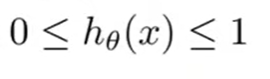

So we will modify the hypothesis of linear regression.<br>
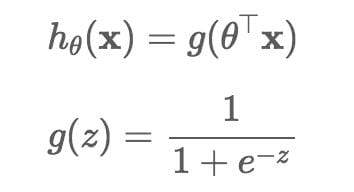<br><br>


Here g is the sigmoid function or the logistic function. This function will map the given number between 0 and 1. So if z is -∞ then g(z) approaches 0 and if z is ∞ then g(z) approaches 1. And therefore it satisfies the property of the hypothesis.<br>
Sigmoid function:<br>
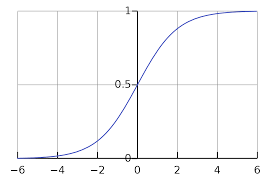

##Decision boundary:
The output of the hypothesis is the probability that y=1 or y=0 given the input x and parameterized theta.<br>
So we will decide on a threshold. And if the probability of output predicted by the hypothesis is greater than the threshold value then the chances of y=1 is more than y=0 and vice versa.<br>
So in short decision boundary is a line that separates the region of the predicted value of y=1 and y=0.

##Cost function:
This function estimates how wrong our model is in terms of its ability. So we minimize the cost function to develop an accurate model with less error.<br>
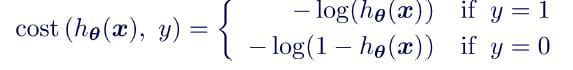<br>
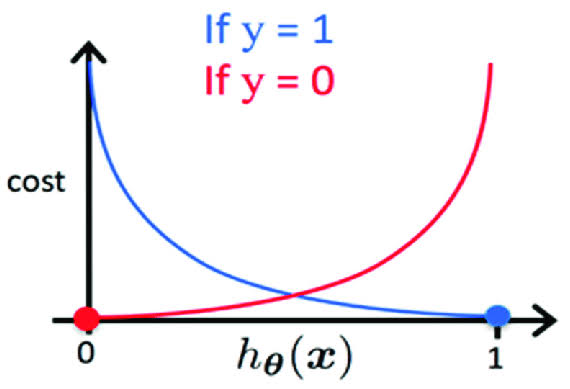<br><br>
The above function can be combined into one.<br>
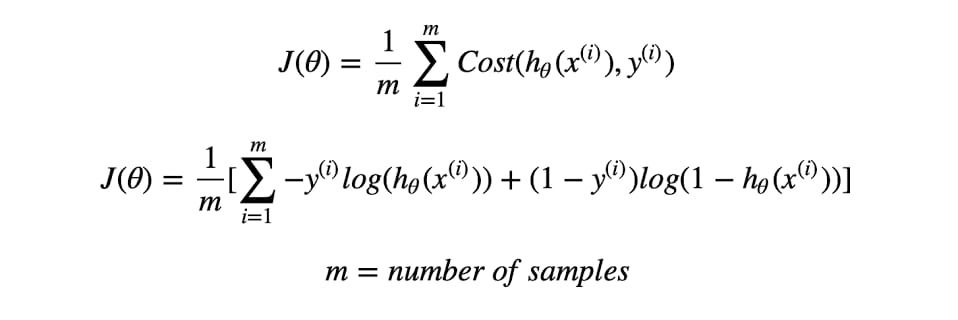

##Gradient descent:
We need to find a parameter theta that will minimize the cost function. So gradient descent aims to minimize the cost function.<br>
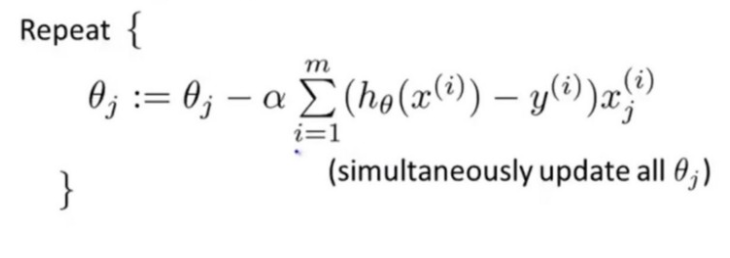<br>
Working of gradient descent:<br>
Start with some initial guess of the parameter and keep changing the value until you get a minimized value for the cost function.<br>
Here the alpha is the learning rate that comes into the picture when we are repeatedly changing the value of the parameter. You have to choose a good value for alpha. If the value of alpha is too large then it will take larger steps that correspond to the aggressive gradient descent.

###I will be using the iris dataset to demonstrate the working of logistic regression without any standard ML library.
Link to dataset: https://www.kaggle.com/uciml/iris

In [ ]:
#importing libraries
import pandas as pd
import numpy as np

In [ ]:
df_iris = pd.read_csv('Iris.csv')   #loading the dataset
df_iris.shape   #print the dimensions of the iris dataset

(150, 6)

In [ ]:
df_iris.head()         #print top 5 rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df_iris.isnull().sum()    #to check if any null value is present or not

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
df_iris['Species'].value_counts()    

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

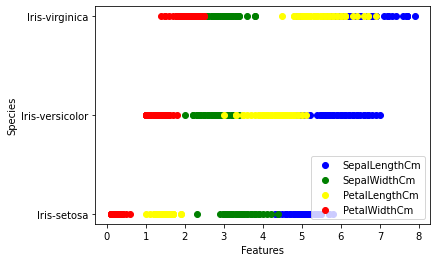

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel("Features")
plt.ylabel("Species")
pltx = df_iris.loc[:, "SepalLengthCm"]
plty = df_iris.loc[:, "Species"]
plt.scatter(pltx, plty, color="blue", label="SepalLengthCm")

pltx = df_iris.loc[:, "SepalWidthCm"]
plty = df_iris.loc[:, "Species"]
plt.scatter(pltx, plty, color="green", label="SepalWidthCm")

pltx = df_iris.loc[:, "PetalLengthCm"]
plty = df_iris.loc[:, "Species"]
plt.scatter(pltx, plty, color="yellow", label="PetalLengthCm")

pltx = df_iris.loc[:, "PetalWidthCm"]
plty = df_iris.loc[:, "Species"]
plt.scatter(pltx, plty, color="red", label="PetalWidthCm")

plt.legend()
plt.show()

In [ ]:
m = df_iris.shape[0]
n = 4   #number of features
k = 3   #total number of labels
X = np.ones((m,n + 1))
Y = np.array((m,1))
X[:,1] = df_iris['SepalLengthCm'].values
X[:,2] = df_iris['SepalWidthCm'].values
X[:,3] = df_iris['PetalLengthCm'].values
X[:,4] = df_iris['PetalWidthCm'].values

#Labels
Y = df_iris['Species'].values

In [ ]:
X

array([[1. , 5.1, 3.5, 1.4, 0.2],
       [1. , 4.9, 3. , 1.4, 0.2],
       [1. , 4.7, 3.2, 1.3, 0.2],
       [1. , 4.6, 3.1, 1.5, 0.2],
       [1. , 5. , 3.6, 1.4, 0.2],
       [1. , 5.4, 3.9, 1.7, 0.4],
       [1. , 4.6, 3.4, 1.4, 0.3],
       [1. , 5. , 3.4, 1.5, 0.2],
       [1. , 4.4, 2.9, 1.4, 0.2],
       [1. , 4.9, 3.1, 1.5, 0.1],
       [1. , 5.4, 3.7, 1.5, 0.2],
       [1. , 4.8, 3.4, 1.6, 0.2],
       [1. , 4.8, 3. , 1.4, 0.1],
       [1. , 4.3, 3. , 1.1, 0.1],
       [1. , 5.8, 4. , 1.2, 0.2],
       [1. , 5.7, 4.4, 1.5, 0.4],
       [1. , 5.4, 3.9, 1.3, 0.4],
       [1. , 5.1, 3.5, 1.4, 0.3],
       [1. , 5.7, 3.8, 1.7, 0.3],
       [1. , 5.1, 3.8, 1.5, 0.3],
       [1. , 5.4, 3.4, 1.7, 0.2],
       [1. , 5.1, 3.7, 1.5, 0.4],
       [1. , 4.6, 3.6, 1. , 0.2],
       [1. , 5.1, 3.3, 1.7, 0.5],
       [1. , 4.8, 3.4, 1.9, 0.2],
       [1. , 5. , 3. , 1.6, 0.2],
       [1. , 5. , 3.4, 1.6, 0.4],
       [1. , 5.2, 3.5, 1.5, 0.2],
       [1. , 5.2, 3.4, 1.4, 0.2],
       [1. , 4

In [ ]:
Y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.30)

In [ ]:
#Logistic regression
from scipy import optimize as op

#sigmoid function
def sigmoid(z):
  return 1.0 / (1 + np.exp(-z))

#cost function
def cost_function(theta, X, y):
  m = len(y)
  h = sigmoid(X.dot(theta))
  return (1 / m) * (-y.T.dot(np.log(h)) - (1 - y).T.dot(np.log(1 - h)))

#gradient descent
def gradient_descent(theta, X, y):
  m, n = X.shape
  theta = theta.reshape((n, 1))
  y = y.reshape((m, 1))
  h = sigmoid(X.dot(theta))
  return ((1 / m) * X.T.dot(h - y))

def logisticRegression(X, y, theta):
    result = op.minimize(fun = cost_function, x0 = theta, args = (X, y),
                         method = 'TNC', jac = gradient_descent)
    return result.x

In [ ]:
Species_list = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
thetas = np.zeros((k, n + 1))
i = 0
for labels in Species_list:
    y_train_temp = np.array(Y_train == labels, dtype = int)
    optimized_theta = logisticRegression(X_train, y_train_temp, np.zeros((n + 1,1)))
    thetas[i] = optimized_theta
    i += 1

In [ ]:
from sklearn.metrics import accuracy_score  
Prediction = sigmoid(X_test.dot(thetas.T))
p = [Species_list[np.argmax(Prediction[i, :])] for i in range(X_test.shape[0])]
print("Test Accuracy: ", accuracy_score(Y_test, p) * 100 ,'%')

Test Accuracy:  97.77777777777777 %


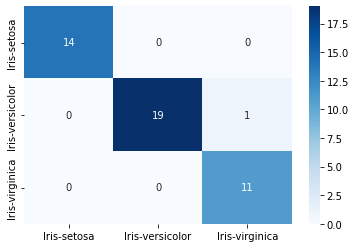

In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
c_matrix = confusion_matrix(Y_test, p, labels = Species_list)
sns.heatmap(c_matrix, annot = True, cmap="Blues", xticklabels = Species_list, yticklabels = Species_list);

####References:
https://towardsdatascience.com/introduction-to-logistic-regression-66248243c148<br>
https://medium.com/@kgpvijaybg/logistic-regression-on-iris-dataset-48b2ecdfb6d3<br>
https://www.researchgate.net/figure/Logistic-Regression-cost-function_fig2_341355577<br>
https://en.wikipedia.org/wiki/Sigmoid_function